# Austin Animal Center Shelter Intakes and Outcomes

## About Dataset

### Context
The [Austin Animal Center](https://www.austintexas.gov/austin-animal-center) is the largest no-kill animal shelter in the United States that provides care and shelter to over 18,000 animals each year. As part of the AAC's efforts to help and care for animals in need, the organization makes available its accumulated data and statistics as part of the city of Austin's Open Data Initiative.

### Content
The data contains intakes and outcomes of animals entering the Austin Animal Center from the beginning of October 2013 to the present day. The datasets are also freely available on the Socrata Open Data Access API and are updated daily.

The following are links to the datasets hosted on Socrata's Open Data:

- [Austin Animal Center Intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm)
- [Austin Animal Center Outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238)

The data contained in this dataset is the outcomes and intakes data as noted above, as well as a combined dataset. The merging of the outcomes and intakes data was done on a unique key that is a combination of the given Animal ID and the intake number. Several of the animals in the dataset have been taken into the shelter multiple times, which creates duplicate Animal IDs that causes problems when merging the two datasets.

Copied from the description of the Shelter Outcomes dataset, here are some definitions of the outcome types:

- Adoption
    - the animal was adopted to a home
- Barn Adoption
    - the animal was adopted to live in a barn
- Offsite Missing
    - the animal went missing for unknown reasons at an offsite partner location
- In-Foster Missing
    - the animal is missing after being placed in a foster home
- In-Kennel Missing
    - the animal is missing after being transferred to a kennel facility
- Possible Theft
    - Although not confirmed, the animal went missing as a result of theft from the facility
- Barn Transfer
    - The animal was transferred to a facility for adoption into a barn environment
- SNR
    - SNR refers to the city of Austin's Shelter-Neuter-Release program. I believe the outcome is representative of the animal being released.
    
### Acknowledgements

The data presented here is only possible through the hard work and dedication of the Austin Animal Center in saving and caring for animal lives.

# Table of Contents
- <a href='#Data-Exploration'>Data Exploration</a>
- <a href='#Feature-Engineering'>Feature Engineering</a>
- <a href='#Data-Visualisation'>Data Visualisation</a>

# Data Exploration

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("aac_intakes.csv")
data.head(10)

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05T12:59:00.000,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
1,11 months,A724273,Dog,Basenji Mix,Sable/White,2016-04-14T18:43:00.000,2016-04-14T18:43:00.000,2818 Palomino Trail in Austin (TX),Normal,Stray,Runster,Intact Male
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female
3,4 years,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29T10:38:00.000,2014-06-29T10:38:00.000,800 Grove Blvd in Austin (TX),Normal,Stray,Rio,Neutered Male
4,2 years,A743852,Dog,Labrador Retriever Mix,Chocolate,2017-02-18T12:46:00.000,2017-02-18T12:46:00.000,Austin (TX),Normal,Owner Surrender,Odin,Neutered Male
5,2 years,A708452,Dog,Labrador Retriever Mix,Black/White,2015-07-30T14:37:00.000,2015-07-30T14:37:00.000,Austin (TX),Normal,Public Assist,Mumble,Intact Male
6,5 months,A731435,Cat,Domestic Shorthair Mix,Cream Tabby,2016-08-08T17:52:00.000,2016-08-08T17:52:00.000,Austin (TX),Normal,Owner Surrender,*Casey,Neutered Male
7,2 years,A760053,Dog,Chihuahua Shorthair,White/Tan,2017-10-11T15:46:00.000,2017-10-11T15:46:00.000,8800 South First Street in Austin (TX),Normal,Stray,NaN,Intact Male
8,5 months,A707375,Dog,Pit Bull,Brown/White,2015-07-11T18:19:00.000,2015-07-11T18:19:00.000,Galilee Court And Damita Jo Dr in Manor (TX),Normal,Stray,*Candy Cane,Intact Female
9,2 years,A696408,Dog,Chihuahua Shorthair,Tricolor,2015-02-04T12:58:00.000,2015-02-04T12:58:00.000,9705 Thaxton in Austin (TX),Normal,Stray,*Pearl,Intact Female


In [2]:
data[data.isna().any(axis=1)]

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
2,4 weeks,A665644,Cat,Domestic Shorthair Mix,Calico,2013-10-21T07:59:00.000,2013-10-21T07:59:00.000,Austin (TX),Sick,Stray,NaN,Intact Female
7,2 years,A760053,Dog,Chihuahua Shorthair,White/Tan,2017-10-11T15:46:00.000,2017-10-11T15:46:00.000,8800 South First Street in Austin (TX),Normal,Stray,NaN,Intact Male
10,2 years,A743114,Cat,Domestic Shorthair Mix,Black/White,2017-02-04T10:10:00.000,2017-02-04T10:10:00.000,208 Beaver St in Austin (TX),Injured,Stray,NaN,Intact Female
14,2 months,A697950,Dog,Australian Cattle Dog/Labrador Retriever,Tan/White,2015-03-04T11:22:00.000,2015-03-04T11:22:00.000,1501 S Fm 973 in Austin (TX),Normal,Stray,NaN,Intact Female
17,5 months,A682230,Dog,Maltese Mix,White,2014-06-25T16:27:00.000,2014-06-25T16:27:00.000,3737 Keats Dr in Austin (TX),Normal,Stray,NaN,Intact Female
...,...,...,...,...,...,...,...,...,...,...,...,...
80178,4 years,A722721,Cat,Domestic Shorthair Mix,Black,2018-03-29T17:54:00.000,2018-03-29T17:54:00.000,1601 Royal Crest Drive in Austin (TX),Normal,Stray,NaN,Spayed Female
80181,1 year,A769065,Other,Bat Mix,Brown,2018-03-29T17:19:00.000,2018-03-29T17:19:00.000,1122 Walton Ln in Austin (TX),Normal,Wildlife,NaN,Unknown
80182,10 years,A769067,Dog,Boxer Mix,Brown Brindle,2018-03-29T18:20:00.000,2018-03-29T18:20:00.000,11216 Jollyville Rd 216 in Austin (TX),Aged,Stray,NaN,Spayed Female
80183,5 years,A768934,Dog,Dachshund Wirehair/Chihuahua Shorthair,Chocolate/White,2018-03-27T14:27:00.000,2018-03-27T14:27:00.000,603 West Johanna Street in Austin (TX),Normal,Stray,NaN,Intact Male


We can see below that there are **24,584** NaN values in the column 'name' and **1** NaN value in the column 'sex_upon_intake'.

In [8]:
data.isna().sum()

age_upon_intake         0
animal_id               0
animal_type             0
breed                   0
color                   0
datetime                0
datetime2               0
found_location          0
intake_condition        0
intake_type             0
name                24584
sex_upon_intake         1
dtype: int64

Since there is only one row that contains a NULL value for *sex_upon_intake*, we will just remove this from the overall dataset.

In [30]:
data = data[data['sex_upon_intake'].notna()]

In [31]:
data.isna().sum()

age_upon_intake         0
animal_id               0
animal_type             0
breed                   0
color                   0
datetime                0
datetime2               0
found_location          0
intake_condition        0
intake_type             0
name                24584
sex_upon_intake         0
dtype: int64

Specifically, out of the 80,186 entries in our dataset, 24,584 of these entries are NaN in the 'name' column. This means that **30.7%** of our entries have NaN values in the column 'name'.

In [32]:
len(data)

80186

In [25]:
data[data['sex_upon_intake'].isnull()]

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
13715,7 years,A667395,Dog,Dachshund,Brown Merle,2013-11-17T13:15:00.000,2013-11-17T13:15:00.000,Pflugerville (TX),Normal,Owner Surrender,Diego,NaN


Note that there are duplicate entries for a given *animal_id*. This suggests that the animal may have been returned to the shelter several times.

In [23]:
data.pivot_table(columns=['animal_id'], aggfunc='size').sort_values(ascending = False).head(10)

animal_id
A721033    13
A718223    11
A706536    11
A716018     9
A694501     8
A616444     8
A738324     8
A701901     7
A738073     7
A671704     7
dtype: int64

# Feature Engineering

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80186 entries, 0 to 80186
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_intake   80186 non-null  object
 1   animal_id         80186 non-null  object
 2   animal_type       80186 non-null  object
 3   breed             80186 non-null  object
 4   color             80186 non-null  object
 5   datetime          80186 non-null  object
 6   datetime2         80186 non-null  object
 7   found_location    80186 non-null  object
 8   intake_condition  80186 non-null  object
 9   intake_type       80186 non-null  object
 10  name              55602 non-null  object
 11  sex_upon_intake   80186 non-null  object
dtypes: object(12)
memory usage: 10.0+ MB


Converting column *'age_upon_intake'* into days:

In [99]:
import re

regex_pattern = '(\d+)(?:\s)([a-z\s]+)'

for i in range(len(data)):
    new = []
    text = data.iloc[i,0]
    match = re.match(regex_pattern, text)

    if match.group(2)[0:3] == 'day':
        new.append (int(match.group(1)))
    elif match.group(2)[0:3] == 'days':
        new.append (int(match.group(1)))
    elif match.group(2)[0:4] == 'week':
        new.append (int(match.group(1))*7)
    elif match.group(2)[0:4] == 'weeks':
        new.append (int(match.group(1))*7)
    elif match.group(2)[0:5] == 'month':
        new.append (int(match.group(1))*30)
    elif match.group(2)[0:5] == 'months':
        new.append (int(match.group(1))*30)
    elif match.group(2)[0:5] == 'year':
        new.append (int(match.group(1))*365)
    elif match.group(2)[0:5] == 'years':
        new.append (int(match.group(1))*365)
    data.iloc[i,0] = new[0]

**TO DO:** Should we create dummy variables for the following columns (shown below)? e.g. is_dog, is_cat, etc?

In [101]:
data['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

In [108]:
data['intake_condition'].unique()

array(['Normal', 'Sick', 'Injured', 'Nursing', 'Aged', 'Other', 'Feral',
       'Pregnant'], dtype=object)

In [110]:
data['intake_type'].unique()

array(['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife',
       'Euthanasia Request'], dtype=object)

**TO DO:** Perhaps we can ignore the following columns (shown below) because the number of unique breeds is just too much.

In [103]:
len(data['breed'].unique())

2166

In [104]:
len(data['color'].unique())

529

In [105]:
len(data['found_location'].unique())

36772

**TO DO:** (For name) If the animal has a name we can create column where has_name = 1.

**TO DO:** (For sex_upon_intake) If the animal has been modified we can create new column where modified = 1.

# Data Visualisation

To further understand the dataset, we will explore key features.

[Text(0.5, 0, 'Animal Type'), Text(0, 0.5, 'Count')]

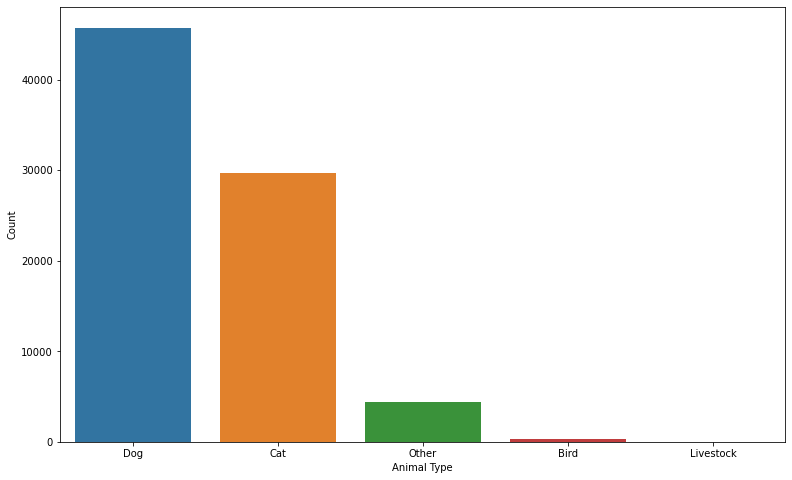

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.countplot('animal_type', data=data,ax=ax)
ax.set(xlabel='Animal Type', ylabel='Count')